In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
# Bud count data for control, BB-94 or GM-6001 treated glands

# day 0
df = pd.read_csv('../data/SMG-bud-count-BB94-GM6001/20210125-BB94-GM6001-E12p5-or-E13-0d-output-824389-budCount.txt')
df.columns = ['file_name', 'bud_count']
df['time'] = ['day0'] * len(df)
df['groups'] = ['control']*5 + ['BB-94']*5 + ['control']*5 + ['GM-6001']*5
df['group_id'] = [df.groups.tolist()[i] + '_' + df.time.tolist()[i] for i in range(len(df))]
df0 = df

df = pd.read_csv('../data/SMG-bud-count-BB94-GM6001/20210126-BB94-GM6001-E12p5-or-E13-1d-output-387588-budCount.txt')
df.columns = ['file_name', 'bud_count']
df['time'] = ['day1'] * len(df)
df['groups'] = ['control']*5 + ['BB-94']*5 + ['control']*5 + ['GM-6001']*5
df['group_id'] = [df.groups.tolist()[i] + '_' + df.time.tolist()[i] for i in range(len(df))]
df1 = df

df = pd.read_csv('../data/SMG-bud-count-BB94-GM6001/20210127-BB94-GM6001-E12p5-or-E13-2d-output-129975-budCount.txt')
df.columns = ['file_name', 'bud_count']
df['time'] = ['day2'] * len(df)
df['groups'] = ['control']*5 + ['BB-94']*5 + ['control']*5 + ['GM-6001']*5
df['group_id'] = [df.groups.tolist()[i] + '_' + df.time.tolist()[i] for i in range(len(df))]
df2 = df

df = pd.concat([df0, df1, df2])
df.head()

,file_name,bud_count,time,groups,group_id
0,20210125-mouse1-BB94-0uM-001_8bit.tif,4,day0,control,control_day0
1,20210125-mouse1-BB94-0uM-002_8bit.tif,4,day0,control,control_day0
2,20210125-mouse1-BB94-0uM-003_8bit.tif,3,day0,control,control_day0
3,20210125-mouse1-BB94-0uM-004_8bit.tif,2,day0,control,control_day0
4,20210125-mouse1-BB94-0uM-005_8bit.tif,4,day0,control,control_day0


<AxesSubplot:xlabel='group_id', ylabel='bud_count'>

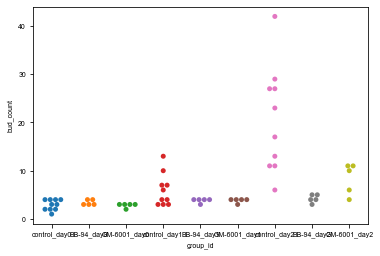

In [3]:
# quick visulization
sns.swarmplot(df.group_id, df.bud_count)

<AxesSubplot:>

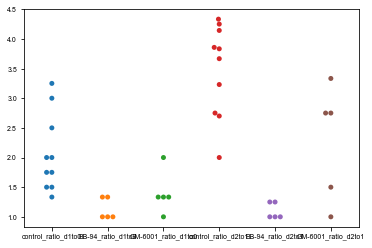

In [4]:
# calculate bud count ratios
ratio_d1to0 = df[df.time=='day1']['bud_count'].values / df[df.time=='day0']['bud_count'].values
ratio_d2to1 = df[df.time=='day2']['bud_count'].values / df[df.time=='day1']['bud_count'].values

# annoate ratios with group id
ratios = ratio_d1to0.tolist() + ratio_d2to1.tolist()
groups = ['ratio_d1to0']*len(ratio_d1to0) + ['ratio_d2to1']*len(ratio_d2to1)
experiment_groups = ['control']*5 + ['BB-94']*5 + ['control']*5 + ['GM-6001']*5 + \
                    ['control']*5 + ['BB-94']*5 + ['control']*5 + ['GM-6001']*5
group_id = [experiment_groups[i] + '_' + groups[i] for i in range(len(groups))]

# quick visulization
sns.swarmplot(group_id, ratios)


<AxesSubplot:>

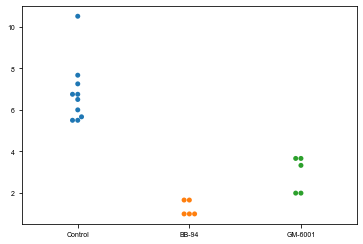

In [9]:
# Important to note that day 1 to day 0 ratio is very sensitive to the initial stage,
# and thus has high variation between experiments
#
# To simplify the plot, only plot the day 2 to day 0, similar as in integrin blocking
# 
ratios = df[df.time=='day2']['bud_count'].values / df[df.time=='day0']['bud_count'].values

# annoate ratios with group id
group_id = ['Control']*5 + ['BB-94']*5 + ['Control']*5 + ['GM-6001']*5

# quick visulization
sns.swarmplot(group_id, ratios)

In [10]:
tukeyTest(ratios, group_id)

Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  BB-94 Control   5.5417  0.001  3.8882  7.1951   True
  BB-94 GM-6001   1.6667 0.0929 -0.2426  3.5759  False
Control GM-6001   -3.875  0.001 -5.5285 -2.2215   True
------------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.09286592 0.001     ]


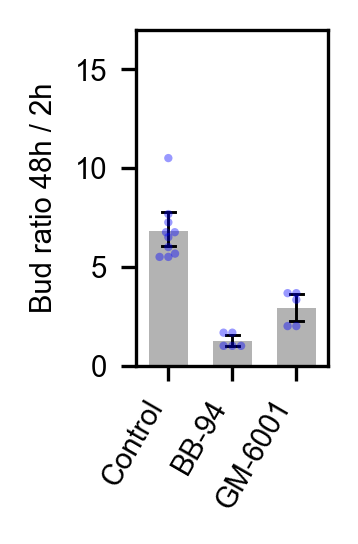

In [13]:
# Swarm and bar plot of different collagenase concentrations

outputPrefix = 'SMG-BB94-GM6001-bud-ratios-day2-to-0'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.8
fig_height=1.4
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x=group_id, y=ratios,
                   color="blue",
                   size=2.0,
                   alpha=.4)

ax = sns.barplot(x=group_id, y=ratios,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 17)
plt.yticks([0, 5, 10, 15])

plt.xlabel(None)
plt.ylabel("Bud ratio 48h / 2h")

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .6)

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)
